In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
import imghdr
import cv2 as cv

In [64]:
data = pd.read_csv('retail_corpus_scraper/rawdata_clean_v4.2.csv')
data.head()

,company,homePage,productName,desc,category,originalPrice,salePrice,currency,productLink,imageLink,...,images_path,length_cm,width_cm,height_cm,extension_cm,cat_condensed,material,material_minus_one,material_plus_one,color
0,MEGAFURNITURE,http://megafurniture.sg/,Fico Sofa Bed,| Dimension Sofa L: 135cm W: 88cm H: 76cm Be...,Sofa,"$1,099.00",$688.00,SGD,https://megafurniture.sg/products/fico-sofa-bed,https://cdn.shopify.com/s/files/1/1805/8667/pr...,...,['0_fico-sofa-bed-sr_1024x1024.jpg'],135;192,88;120,76;40,;,sofa,NaN,NaN,NaN,NaN
1,MEGAFURNITURE,http://megafurniture.sg/,Marlene Blue Fabric Recliner Armchair Sofa,| | | | | Kiln Dried Wooden Frame St...,Sofa,$299.00,NaN,SGD,https://megafurniture.sg/products/marlene-blue...,https://cdn.shopify.com/s/files/1/1805/8667/pr...,...,['1_marlene-blue-fabric-recliner-armchair-sofa...,21;77,30;75,;100,;,sofa,NaN,NaN,NaN,NaN
2,MEGAFURNITURE,http://megafurniture.sg/,Delaware L-shaped Fabric Sofa,| Solid Wooden Frame Wood High Destiny Foam ...,Sofa,$788.00,NaN,SGD,https://megafurniture.sg/products/delaware-l-s...,https://cdn.shopify.com/s/files/1/1805/8667/pr...,...,['2_delaware-l-shaped-fabric-sofa-sk_1024x1024...,213.5;80,87;59,98;63,;,sofa,"wood,fabric","Frame wood,Foam fabric","wood High,fabric L",NaN
3,MEGAFURNITURE,http://megafurniture.sg/,Mandy Grey Fabric Sofa,| Dimensions: | 3 Seater Sofa L : 210cm W...,Sofa,"$1,599.00","$1,099.00",SGD,https://megafurniture.sg/products/mandy-grey-f...,https://cdn.shopify.com/s/files/1/1805/8667/pr...,...,['3_mandy-grey-fabric-sofa-zc_1024x1024.jpg'],210,92,82,NaN,sofa,NaN,NaN,NaN,NaN
4,MEGAFURNITURE,http://megafurniture.sg/,Tegan I Sofa Bed,Details | Upholstered in Quality Fabric Sol...,Sofa,$899.00,NaN,SGD,https://megafurniture.sg/products/reagan-purpl...,https://cdn.shopify.com/s/files/1/1805/8667/pr...,...,['4_tegan-i-sofa-bed-sh_1024x1024.jpg'],160;195,95;145,87;45,;,sofa,"fabric,wood","Quality fabric,Solid wood","fabric ,wood Internal",NaN


In [65]:
data.columns

Index(['company', 'homePage', 'productName', 'desc', 'category',
       'originalPrice', 'salePrice', 'currency', 'productLink', 'imageLink',
       'dateScraped', 'images_path', 'length_cm', 'width_cm', 'height_cm',
       'extension_cm', 'cat_condensed', 'material', 'material_minus_one',
       'material_plus_one', 'color'],
      dtype='object')

In [66]:
data.category.nunique()

626

In [109]:
data.groupby('category').size().sort_values(ascending=False)

category
Dining Chairs                        878
TV Consoles                          614
Storage Cabinets PlasticMetalWood    599
Chest of Drawers                     590
Coffee Tables                        581
                                    ... 
Quilt                                  1
Dishwasher                             1
Display Shelves  Ledges                1
Poufs  Bean Bags                       1
Wrapping Paper                         1
Length: 626, dtype: int64

In [101]:
# CREATING CATEGORY FOLDERS/CLASSES

cat = [] # to avoid having same category, check here

for c in data['category'].unique():   
    present = False
    if type(c) != str:
        c = 'Others'
        c_incat = 'Others'
        if c_incat not in cat:
            cat.append(c_incat)
        else:
            present = True
    else:       
        c_incat = ''.join(c.split()).lower()
        if c_incat not in cat:
            cat.append(c_incat)
        else:
            present = True
            
    if present == False:
        path = os.path.join("retail_corpus_scraper/", c.strip()) 
        os.mkdir(path)

In [102]:
str(len(cat)) + ' class folders created'

'619 class folders created'

In [71]:
uniq1 = data['category'].apply(lambda x: x.strip() if type(x) == str else x).unique()
uniq1 = [x for x in uniq1 if str(x) != 'nan']
uniq2 = list(data['category'].unique())
np.setdiff1d(uniq2, uniq1) 

array([' 2 in 1 Beds', ' Day Beds', ' Double Deck  Bunk Beds',
       ' Fabric Beds', ' Faux Leather Beds', ' Foldable Beds',
       ' Metal Beds', ' Poster Beds', ' Storage Beds', ' Wooden Beds',
       'Childrens Room ', 'Outdoor Chairs ', 'RecessIn Downlights ',
       'nan'], dtype='<U46')

In [107]:
# MOVING FILES FROM RENAMED_IMAGES TO RESPECTIVE FOLDERS

for i in range(len(data)):
    c = data.iloc[i]['category'] 
    if type(c) != str:
        c = 'Others'
    else:
        c = c.strip()
    file_path = os.path.join("retail_corpus_scraper/", c)         
    images = data.iloc[i]['images_path'][1:-1].split(',')
    for i in range(len(images)):
        img = images[i]
        if i == 0:
            img = img[1:-1]
        else:
            img = img[2:-1]
        old_path = os.path.join("retail_corpus_scraper/renamed_images/", img) 
        new_path = os.path.join(file_path, img) 
        if (os.path.isfile(old_path)): # if old path exists
            try:
                shutil.move(old_path, new_path)
            except FileNotFoundError:
                print("{} not in corpus or can't be moved".format(img))

In [108]:
imges = data.iloc[26071]['images_path'][1:-1].split(',')
for i in range(len(imges)):
    if i == 0:
        print(imges[i][1:-1])
    else:
        print(imges[i][2:-1])

26071_157e9bb2f927580c88354c624cf5bb7e_tn
26071_3833a0afb20d8218f549f863d471c935_tn
26071_65d571ad992fb9bc9fedf8469da87eec_tn
26071_0d62633fc5f474d3b8ecd7bb51487b6e_tn
26071_447d75dfed2eebac9810513735274777_tn


In [20]:
test = data.iloc[-1]['images_path']
print(test)
test = test[1:-1]
print(test)
test = test.split(',')
for t in test:
    print(t[1:-1])
#     print(type(t))
# print(test.split(','))


['28808_026be6fcba9729a7896db3e6536959bf_tn', '28808_24173e7b67b3a09d69cc8a51f72d5f8e_tn', '28808_a6124b5888e73b1c1ae49bcc672e7973_tn']
'28808_026be6fcba9729a7896db3e6536959bf_tn', '28808_24173e7b67b3a09d69cc8a51f72d5f8e_tn', '28808_a6124b5888e73b1c1ae49bcc672e7973_tn'
28808_026be6fcba9729a7896db3e6536959bf_tn
'28808_24173e7b67b3a09d69cc8a51f72d5f8e_tn
'28808_a6124b5888e73b1c1ae49bcc672e7973_tn


In [27]:
os.path.isfile('retail_corpus_scraper/renamed_images/3742_PB1003_2-800x600_0.jpg')

True

In [110]:
os.path.exists('retail_corpus_scraper/renamed_images_copy/3742_PB1003_2-800x600_0.jpg')

True

In [113]:
[i for i in np.random.permutation(np.arange(5))]

[0, 2, 1, 4, 3]

In [118]:
np.flatnonzero(2 == 2)

array([0], dtype=int64)

In [3]:
# pip list

In [119]:
from matplotlib.image import imread

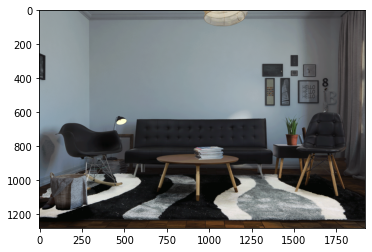

In [124]:
img = imread(os.path.join('retail_corpus/', 'Office Reception Sofas/', '22209_contemporary_group-1a_2.gif'))
plt.imshow(img)
plt.show()